<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

# Internship Project - Loan Approval AI-ML Model

All cells must be suitably commented / documented.

### Read Datasets

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline  

In [3]:
# read_csv() is used to read a csv file.
testdata = pd.read_csv("test.csv") 
traindata = pd.read_csv("train.csv")

# Adding a type column to specify whether it is test or train data which is used later to spilt.
traindata['Type']='Train' 
testdata['Type']='Test'

# combining the test and train data.
combined_data = [traindata,testdata]
full_data = pd.concat(combined_data)

# Loan status does not depends on loan id
del full_data['Loan_ID'] 
full_data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Type
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Train
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Train
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Train
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Train
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Train
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,Train
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Train
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Train
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,Train
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,Train


### Handle Categorical Values

In [4]:
print(full_data.info())
# using .info() function to check for categorical values in the DataFrame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Type               981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB
None


In [5]:
cat_combined = full_data.select_dtypes(include=['object']).copy() # .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one.
cat_combined.drop('Dependents', inplace=True, axis=1)
cat_combined.head(10)

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Type
0,Male,No,Graduate,No,Urban,Y,Train
1,Male,Yes,Graduate,No,Rural,N,Train
2,Male,Yes,Graduate,Yes,Urban,Y,Train
3,Male,Yes,Not Graduate,No,Urban,Y,Train
4,Male,No,Graduate,No,Urban,Y,Train
5,Male,Yes,Graduate,Yes,Urban,Y,Train
6,Male,Yes,Not Graduate,No,Urban,Y,Train
7,Male,Yes,Graduate,No,Semiurban,N,Train
8,Male,Yes,Graduate,No,Urban,Y,Train
9,Male,Yes,Graduate,No,Semiurban,N,Train


__*In the above code, we dropped the "Dependents" and "Loan_ID" columns because they have numerical values and does not come under categorical values.
The .info() function we have used in the previous code is not always reliable, so we have to manually check for the categorical values.*__

In [6]:
print(cat_combined.isnull().values.sum()) 
# to check the total number of missing values in the DataFrame

449


In [7]:
print(cat_combined.isnull().sum()) 
# to check the column wise distribution of null values.

Gender            24
Married            3
Education          0
Self_Employed     55
Property_Area      0
Loan_Status      367
Type               0
dtype: int64


___The 367 missing values in Loan_Staus are from the test type which are not reqired, because later we will split into test and train data___

### Check for Missing Data

In [8]:
print(full_data.isnull().values.sum()) 
# to check the total number of missing values in the DataFrame.

600


In [9]:
print(full_data.isnull().sum()) 
# to check the column wise distribution of null values.

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Type                   0
dtype: int64


In [10]:
#Imputing Missing values with mean for continuous variable
full_data['LoanAmount'].fillna(full_data['LoanAmount'].mean(), inplace=True)
full_data['Loan_Amount_Term'].fillna(full_data['Loan_Amount_Term'].mean(), inplace=True)
full_data['ApplicantIncome'].fillna(full_data['ApplicantIncome'].mean(), inplace=True)
full_data['CoapplicantIncome'].fillna(full_data['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
full_data['Gender'].fillna(full_data['Gender'].mode()[0], inplace=True)
full_data['Married'].fillna(full_data['Married'].mode()[0], inplace=True)
full_data['Dependents'].fillna(full_data['Dependents'].mode()[0], inplace=True)
full_data['Loan_Amount_Term'].fillna(full_data['Loan_Amount_Term'].mode()[0], inplace=True)
full_data['Credit_History'].fillna(full_data['Credit_History'].mode()[0], inplace=True)
full_data['Self_Employed'].fillna(full_data['Self_Employed'].mode()[0], inplace=True)
full_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Type
0,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,Train
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,Train
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,Train
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,Train
4,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.00000,360.0,1.0,Urban,NaN,Test
363,Male,Yes,0,Graduate,No,4158,709.0,115.00000,360.0,1.0,Urban,NaN,Test
364,Male,No,0,Graduate,No,3250,1993.0,126.00000,360.0,1.0,Semiurban,NaN,Test
365,Male,Yes,0,Graduate,No,5000,2393.0,158.00000,360.0,1.0,Rural,NaN,Test


In [11]:
print(full_data.isnull().values.sum()) 
# to check the total number of missing values in the DataFrame after mode imputation

367


___The 367 missing values in Loan_Staus are from the test type which are not reqired, because later we will split the data based on type column and we will drop the Loan_Staus in test type___

### _Explanatory Data Analysis_
#### We will use visualization techniques to represent our data

<AxesSubplot:xlabel='count', ylabel='Gender'>

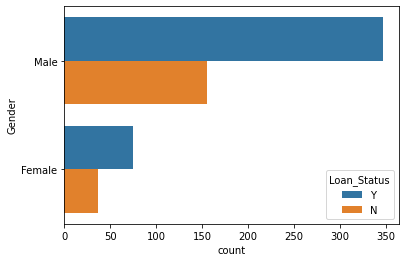

In [12]:
sns.countplot(y ='Gender',hue = 'Loan_Status',data= full_data)

- ___Males are taking more loan than females.___

<AxesSubplot:xlabel='count', ylabel='Married'>

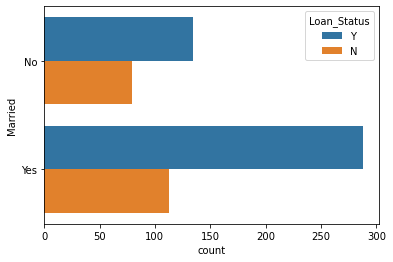

In [13]:
sns.countplot(y ='Married',hue = 'Loan_Status', data = full_data)

- ___Married people are taking more loans than unmarried people.___

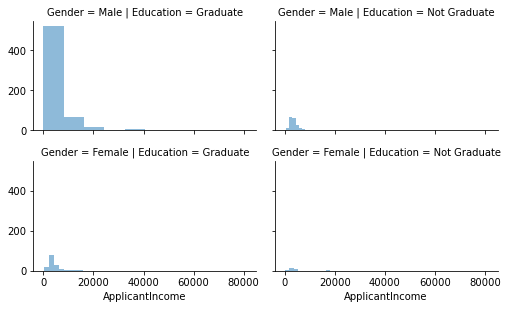

In [14]:
grid = sns. FacetGrid(full_data, row='Gender', col='Education',height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome',alpha=.5, bins=10)
grid.add_legend()

- ___A male who is a graduate has more income.___

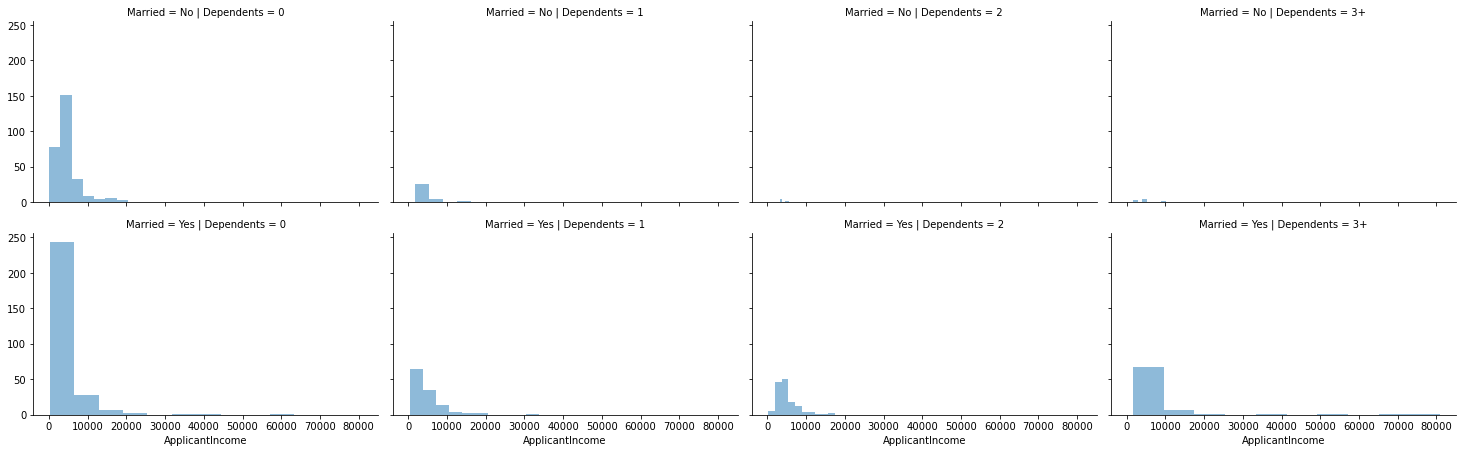

In [15]:
grid = sns.FacetGrid(full_data, row='Married',col='Dependents', height=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

- ___An unmarried person with no dependent has more income.___

In [16]:
# Convert the non-numerical data into numerical data
# we can also use Label Encoder to complete this task

full_data['Loan_Status'].replace('Y',1,inplace=True)
full_data['Loan_Status'].replace('N',0,inplace=True)

full_data.Gender=full_data.Gender.map({'Male':1,'Female':0})

full_data.Married=full_data.Married.map({'Yes':1,'No':0})

full_data.Dependents=full_data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
full_data['Dependents'].value_counts()

full_data.Education=full_data.Education.map({'Graduate':1,'Not Graduate':0})

full_data.Self_Employed=full_data.Self_Employed.map({'Yes':1,'No':0})

full_data.Property_Area=full_data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

full_data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Type
0,1,0,0,1,0,5849,0.0,142.51153,360.000000,1.0,2,1.0,Train
1,1,1,1,1,0,4583,1508.0,128.00000,360.000000,1.0,0,0.0,Train
2,1,1,0,1,1,3000,0.0,66.00000,360.000000,1.0,2,1.0,Train
3,1,1,0,0,0,2583,2358.0,120.00000,360.000000,1.0,2,1.0,Train
4,1,0,0,1,0,6000,0.0,141.00000,360.000000,1.0,2,1.0,Train
5,1,1,2,1,1,5417,4196.0,267.00000,360.000000,1.0,2,1.0,Train
6,1,1,0,0,0,2333,1516.0,95.00000,360.000000,1.0,2,1.0,Train
7,1,1,3,1,0,3036,2504.0,158.00000,360.000000,0.0,1,0.0,Train
8,1,1,2,1,0,4006,1526.0,168.00000,360.000000,1.0,2,1.0,Train
9,1,1,1,1,0,12841,10968.0,349.00000,360.000000,1.0,1,0.0,Train


### Split Data for Training and Testing

- ___Train Dataset: Used to fit the machine learning model.___
- ___Test Dataset: Used to evaluate the fit machine learning model.___

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Splitting the full_data into train_dataset and test_dataset based on the 'Type' column
train_dataset=full_data[full_data['Type']=='Train']
test_dataset=full_data[full_data['Type']=='Test']

# We have to predict the loan_status for test_dataset, so droping the 'Loan_staus' which is null and 'Type' columns.
testdata_updated=test_dataset.drop(["Loan_Status","Type"], axis = 1)


x = train_dataset.drop(["Loan_Status","Type"], axis = 1)
y = train_dataset["Loan_Status"].values

'''We should have correct Loan_satus values of the testdata in order to compare the
   predicted output with correct output to get performance of model, But test_dataset do not have Loan_Status.
   So lets split the x and y into 30% for testing and 70% for training. 
   Later we can predict the Loan_Status values of test_dataset.'''

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)


### Apply different Classification Algorithms and tune them

### Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression Model

LR=LogisticRegression(max_iter=800)

# Traing the model
LR.fit(x_train,y_train)

LogisticRegression(max_iter=800)

In [19]:
#Predicting x_test
log_pred = LR.predict(x_test)

In [20]:
#The prediction for test_dataset using logistic Regression Model
log_pred_testdata =LR.predict(testdata_updated)
log_pred_testdata

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

DTClassifier=DecisionTreeClassifier(criterion="entropy", random_state=101)

#Traing the model
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [22]:
#predicting the x_test with DT
dt_pred=DTClassifier.predict(x_test)

In [23]:
#The prediction for test_dataset using DT Classifier
dt_pred_testdata = DTClassifier.predict(testdata_updated)
dt_pred_testdata

array([1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1.

### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier()

# Training Model
RFC.fit(x_train, y_train)

# Predicting the x_test with RFC
RFC_pred=RFC.predict(x_test)

In [25]:
#The prediction for test_dataset using RF Classifier
RFC_pred_testdata = RFC.predict(testdata_updated)
RFC_pred_testdata

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

### Get performance metrics for all the applied classifiers

In [26]:
#Creating a list to store the accuracy values of the all classifiers
from sklearn.metrics import confusion_matrix
accuracy_score=[]
Model=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier']

#### Performance metrics for Logistic Regression Model

In [27]:
#Predicting x_test with Logistic Regression Model
log_pred = LR.predict(x_test) 

# Accuracy for Logistic Regression model
accuracy_score.append(metrics.accuracy_score(log_pred,y_test))
print('Logistic Regression accuracy = ', metrics.accuracy_score(log_pred,y_test))

print('\nLogistic Regression:')
print(metrics.classification_report(log_pred,y_test))

Logistic Regression accuracy =  0.8324324324324325

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.43      0.92      0.59        24
         1.0       0.99      0.82      0.89       161

    accuracy                           0.83       185
   macro avg       0.71      0.87      0.74       185
weighted avg       0.91      0.83      0.85       185



In [28]:
#Confusion Matric for LR
cm_logistic_regression = confusion_matrix(log_pred,y_test)
cm_logistic_regression

array([[ 22,   2],
       [ 29, 132]], dtype=int64)

#### Performance metrics for Decision Tree Classifier

In [29]:
#predicting the x_test with DT
dt_pred=DTClassifier.predict(x_test)

# Accuracy for Decision Tree Classifier
accuracy_score.append(metrics.accuracy_score(dt_pred,y_test))
print("DT Accuracy: ",metrics.accuracy_score(dt_pred,y_test))

print('\nDecision Tree Classifier:')
print(metrics.classification_report(y_test,dt_pred))

DT Accuracy:  0.7351351351351352

Decision Tree Classifier:
              precision    recall  f1-score   support

         0.0       0.52      0.59      0.55        51
         1.0       0.83      0.79      0.81       134

    accuracy                           0.74       185
   macro avg       0.68      0.69      0.68       185
weighted avg       0.75      0.74      0.74       185



In [30]:
#Confusion Matrix for DTC
cm_decisiontree_classifier = confusion_matrix(dt_pred,y_test)
cm_decisiontree_classifier

array([[ 30,  28],
       [ 21, 106]], dtype=int64)

#### Performance metrics for Random Forest Classifier

In [31]:
# Predicting the x_test with RFC
RFC_pred=RFC.predict(x_test)

# Accuracy for RFC
accuracy_score.append(metrics.accuracy_score(RFC_pred,y_test))
print('Random Forest Classifier accuracy = ', metrics.accuracy_score(RFC_pred,y_test))

print('\nRandom Forest Classifier:')
print(metrics.classification_report(y_test,dt_pred))



Random Forest Classifier accuracy =  0.7945945945945946

Random Forest Classifier:
              precision    recall  f1-score   support

         0.0       0.52      0.59      0.55        51
         1.0       0.83      0.79      0.81       134

    accuracy                           0.74       185
   macro avg       0.68      0.69      0.68       185
weighted avg       0.75      0.74      0.74       185



In [32]:
#Confusion Matric for RFC
cm_randomforest_classifier = confusion_matrix(RFC_pred,y_test)
cm_randomforest_classifier

array([[ 21,   8],
       [ 30, 126]], dtype=int64)

### Visually compare the performance of all classifiers

#### Comparing Accuracy of classifiers in Table

In [33]:
df=pd.DataFrame()
df['Model']=Model
df['Accuracy']=accuracy_score

color=sns.light_palette("green",as_cmap=True)
visual=df.style.background_gradient(cmap=color)
visual

,Model,Accuracy
0,Logistic Regression,0.832432
1,Decision Tree Classifier,0.735135
2,Random Forest Classifier,0.794595


#### Comparing Accuracy of classifiers in Bar Plot

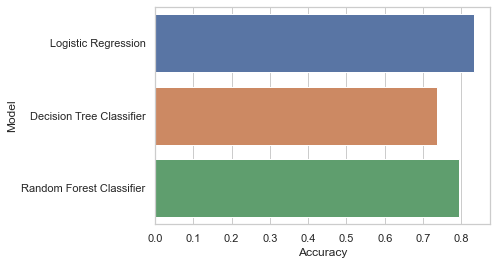

In [34]:
sns.set(style="whitegrid")
ax=sns.barplot(y='Model',x='Accuracy',data=df)

#### Confusion Matrix HeatMap:
___A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.___

<AxesSubplot:>

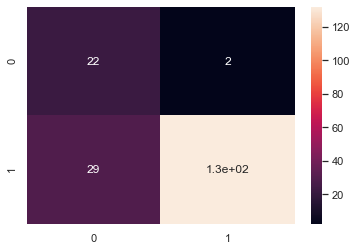

In [35]:
#Logistic Regression model performance

sns.heatmap(cm_logistic_regression, annot=True)

<AxesSubplot:>

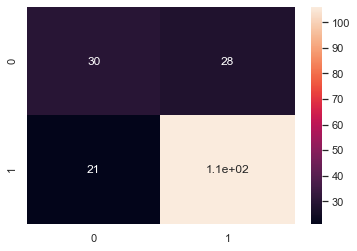

In [36]:
#DecisionTree Model performance

sns.heatmap(cm_decisiontree_classifier, annot=True)

<AxesSubplot:>

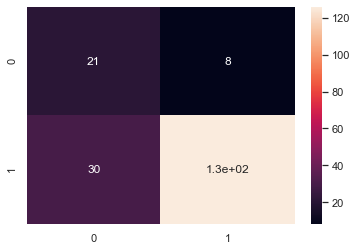

In [37]:
#Randomforest Model performance

sns.heatmap(cm_randomforest_classifier, annot=True)

### Logistic Regression:
- ___An advantage of logistic regression is that it allows the evaluation of multiple explanatory variables by extension of the basic principles. The general equation is___



### Decision Tree:
- ___Decision tree can be used to classify information optimally. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.___

### Random Forest:
- ___Random Forest classifier is a classification algorithm that consists of many decision trees. It runs efficiently on large data bases. It can handle thousands of input variables without variable deletion.___

### Conclusion:
- ___Based on our observations from the project given, we can conclude that Logistic Regression is the most suitable classifier since it has high performance metrics.___